In [16]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_data_dir = 'data/train'
validation_data_dir = 'data/test'
num_classes = 3

In [9]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [10]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 693 images belonging to 3 classes.
Found 171 images belonging to 3 classes.


In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10
21/21 [==============================] - 81s 4s/step - loss: 0.8319 - accuracy: 0.6415 - val_loss: 1.5203 - val_accuracy: 0.1312
Epoch 2/10
21/21 [==============================] - 90s 4s/step - loss: 0.6029 - accuracy: 0.7685 - val_loss: 1.4104 - val_accuracy: 0.2313
Epoch 3/10
21/21 [==============================] - 94s 4s/step - loss: 0.5174 - accuracy: 0.8003 - val_loss: 1.2772 - val_accuracy: 0.3250
Epoch 4/10
21/21 [==============================] - 97s 5s/step - loss: 0.4648 - accuracy: 0.8170 - val_loss: 1.3193 - val_accuracy: 0.2250
Epoch 5/10
21/21 [==============================] - 95s 5s/step - loss: 0.4246 - accuracy: 0.8457 - val_loss: 1.1503 - val_accuracy: 0.5250
Epoch 6/10
21/21 [==============================] - 96s 5s/step - loss: 0.3926 - accuracy: 0.8669 - val_loss: 1.2614 - val_accuracy: 0.3125
Epoch 7/10
21/21 [==============================] - 97s 5s/step - loss: 0.3213 - accuracy: 0.9032 - val_loss: 1.3575 - val_accuracy: 0.2937
Epoch 8/10
21/21 [==

In [17]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.831887,0.641452,1.520324,0.13125
1,0.602915,0.768533,1.410409,0.23125
2,0.517432,0.800303,1.277151,0.32500
3,0.464766,0.816964,1.319340,0.22500
4,0.424556,0.845688,1.150314,0.52500


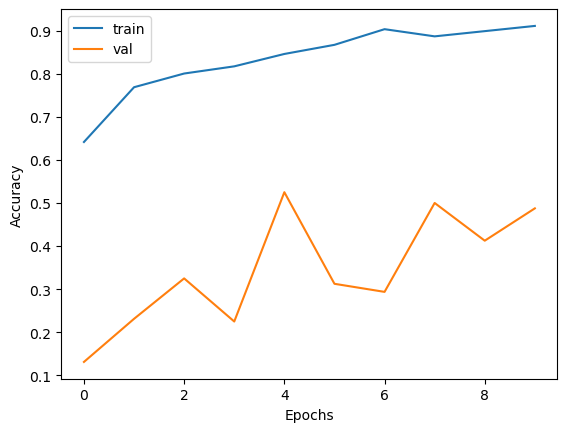

In [18]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

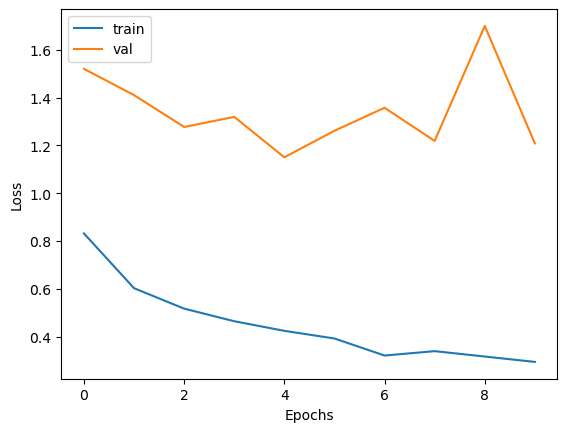

In [19]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [20]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

6/6 [==============================] - 16s 3s/step - loss: 1.2127 - accuracy: 0.4854
Test accuracy: 0.4853801131248474


In [21]:
model.save("fire.h5")